#Oulier Detection Using Z-score method on Normally distributed data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('placement.csv')

In [6]:

df.sample(5)

,cgpa,placement_exam_marks,placed
813,7.43,52.0,1
664,7.23,34.0,0
871,6.56,60.0,0
36,6.85,16.0,1
400,6.00,33.0,1


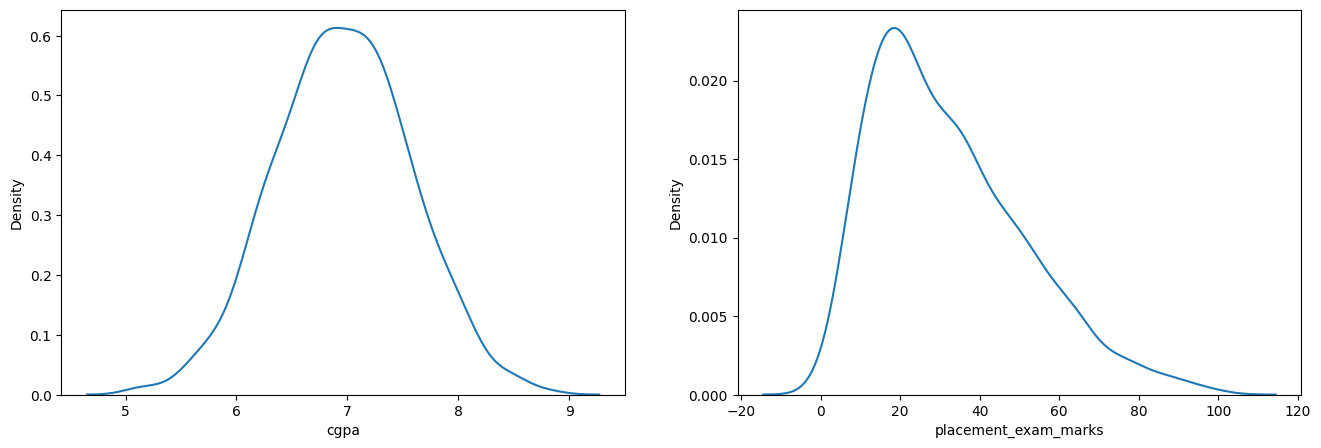

In [31]:

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'])

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'])

plt.show()

CGPA is normal but exam_marks is skewed

In [8]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [9]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [10]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [11]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


only 5 therefore we can do trimming or capping!

### Trimming

In [12]:

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


### Approach 2: Calculating the Zscore

In [13]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [14]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [20]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


same outliers in both the cases u.e. z-score == normal 3sd + u and 3sd - u

In [21]:
# Trimming
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [23]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


###Capping

In [22]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [24]:
lower_limit

np.float64(5.113546374602832)

In [25]:
upper_limit

np.float64(8.808933625397168)

In [27]:
df['cgpa'] = np.where( #kind of if else thing
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [28]:
df.shape

(1000, 4)

In [29]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934


#Outlier Detection using IQR method on Skewed data

In [33]:
df = pd.read_csv('placement.csv')

In [34]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


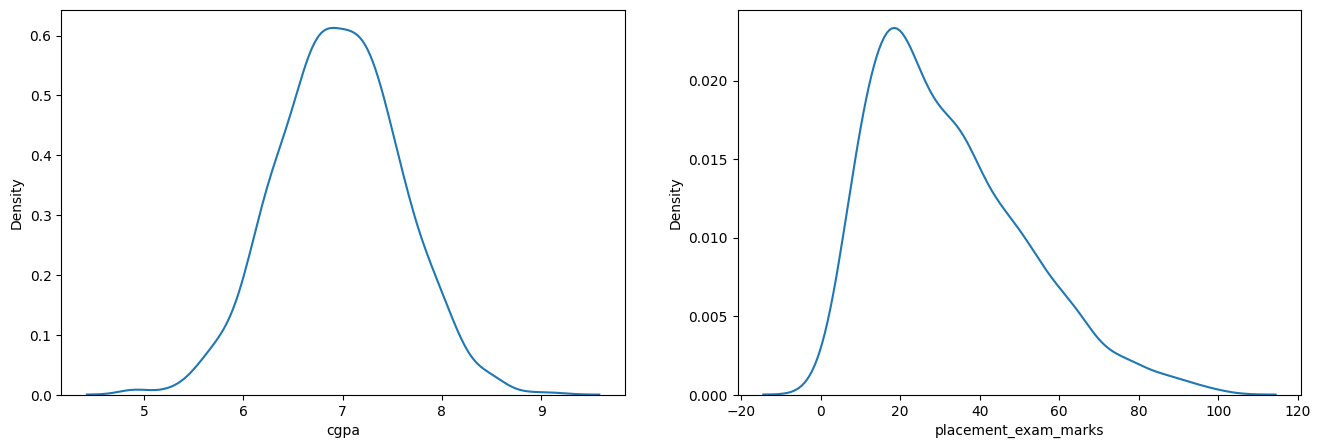

In [36]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'])

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'])

plt.show()

In [47]:
df['cgpa'].skew() #close to zero

np.float64(-0.014529938929314918)

In [44]:
df['placement_exam_marks'].skew() #skewed

np.float64(0.8356419499466834)

In [37]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


<Axes: ylabel='placement_exam_marks'>

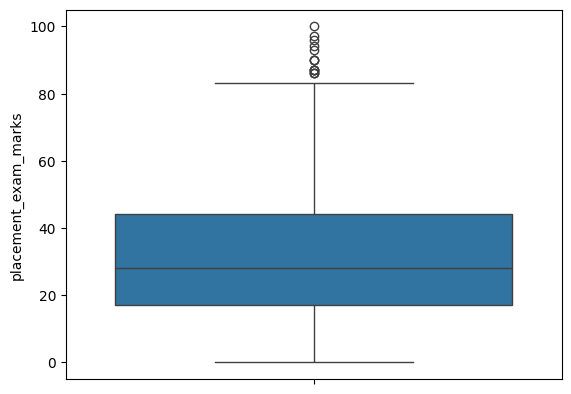

In [40]:
sns.boxplot(df['placement_exam_marks'])

In [41]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [42]:
iqr = percentile75 - percentile25

In [48]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [49]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


###Finding Outliers

In [54]:
df[df['placement_exam_marks'] > upper_limit].count()

,0
cgpa,15
placement_exam_marks,15
placed,15


therefore 15 outliers

In [51]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


###Trimming

In [55]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [56]:
new_df.shape

(985, 3)

removed those 15 rows

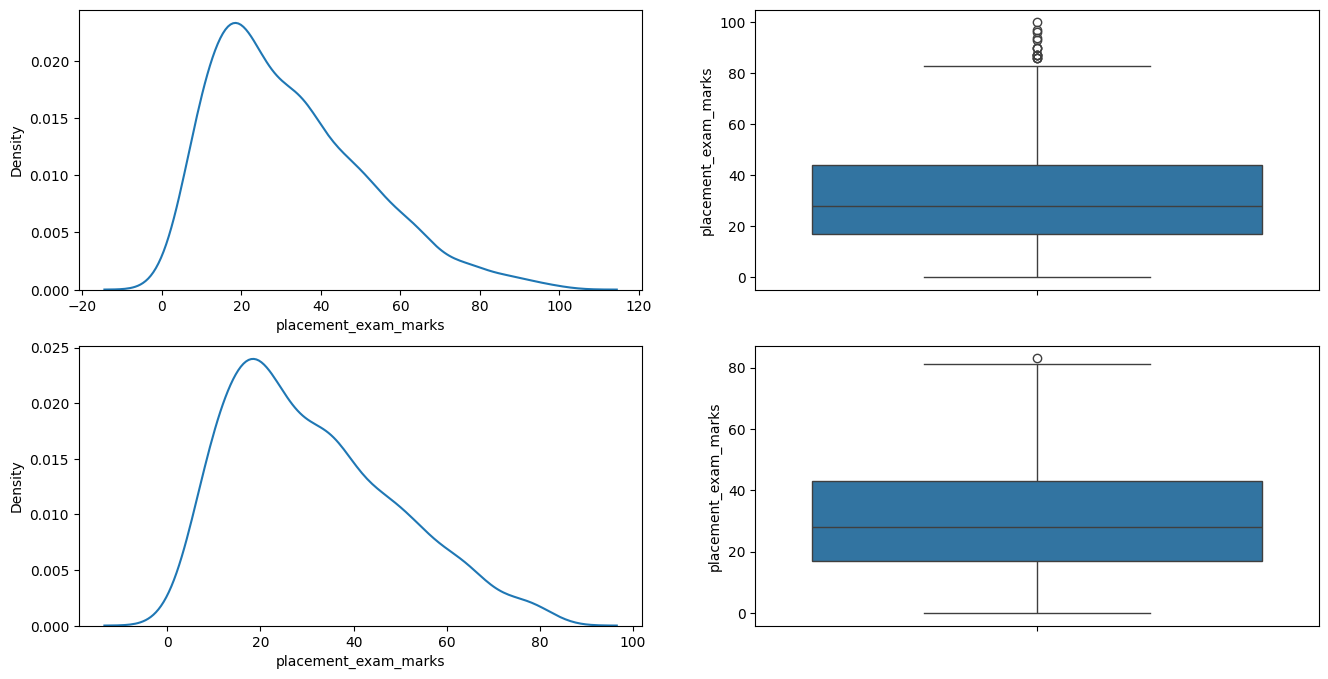

In [57]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.kdeplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

###Capping

In [58]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [60]:
new_df_cap.shape

(1000, 3)

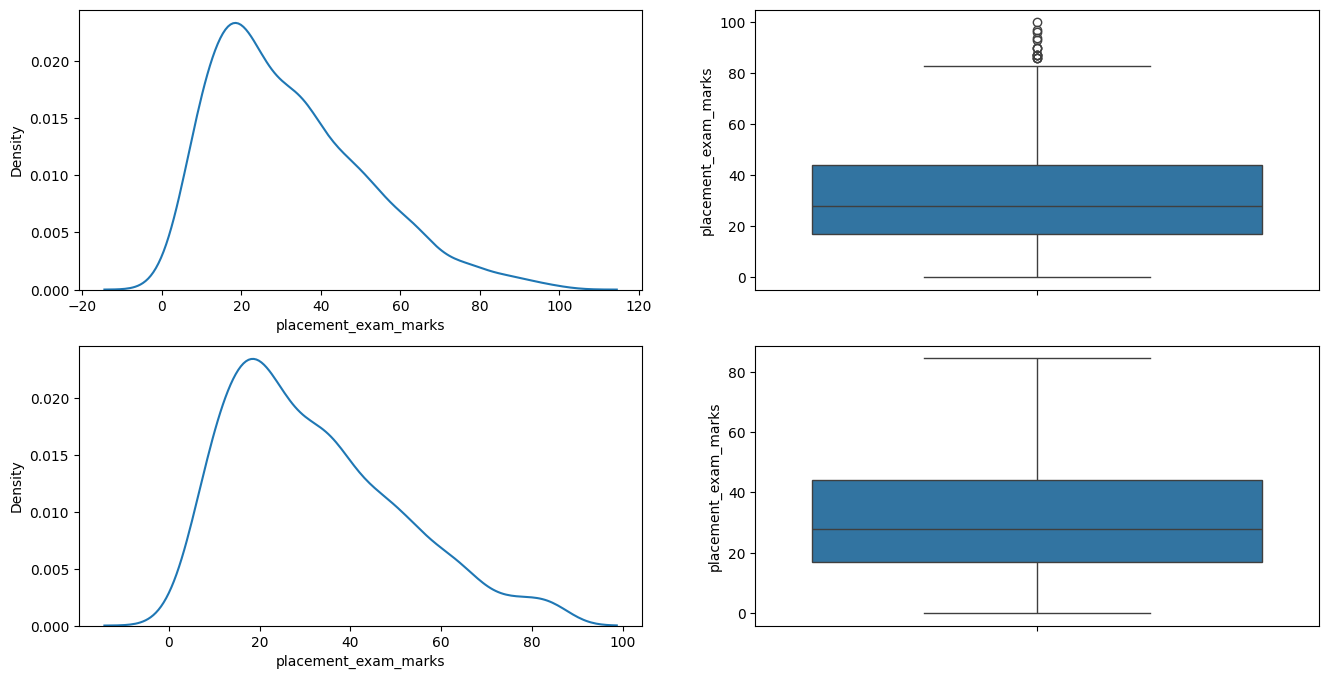

In [61]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.kdeplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()

#Outlier Detection Using %ile Method

In [63]:
df = pd.read_csv('weight-height.csv')

In [64]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [66]:
df.shape

(10000, 3)

In [67]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<Axes: xlabel='Height', ylabel='Density'>

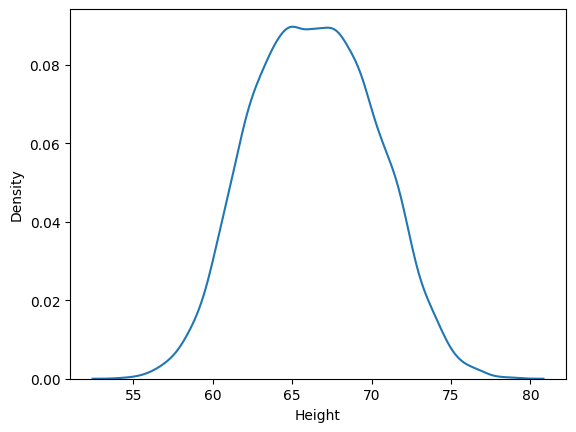

In [69]:
sns.kdeplot(df['Height'])

<Axes: ylabel='Height'>

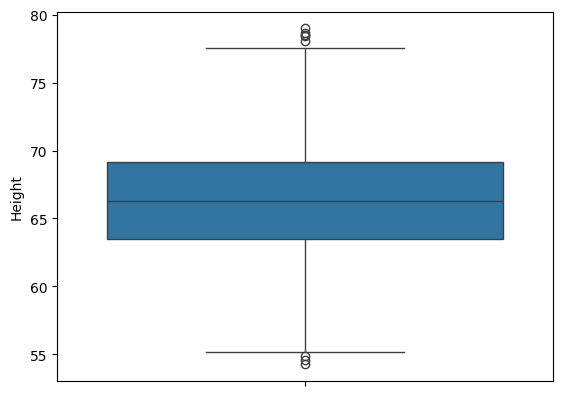

In [70]:
sns.boxplot(df['Height'])

In [71]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

np.float64(74.7857900583366)

In [72]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

np.float64(58.13441158671655)

###Trimming

In [73]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [74]:
new_df['Height'].describe()

,Height
count,9799.000000
mean,66.363507
std,3.644267
min,58.134496
25%,63.577147
50%,66.317899
75%,69.119859
max,74.767447


<Axes: xlabel='Height', ylabel='Density'>

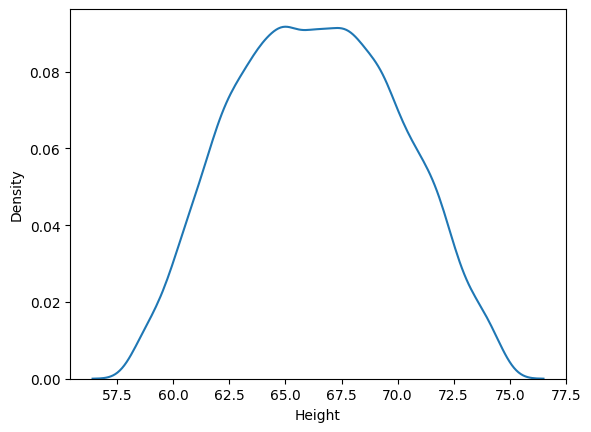

In [79]:
#Comparing
sns.kdeplot(new_df['Height'])

<Axes: ylabel='Height'>

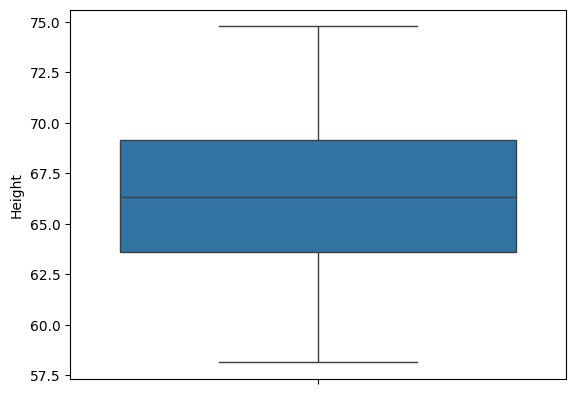

In [80]:
sns.boxplot(new_df['Height'])

No outliers

###Capping or Winsarization

In [87]:
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))
#Many times people cap with upper_limit + 1 and lower_limit - 1

In [82]:
df.shape

(10000, 3)

In [83]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.366281
std,3.795717
min,58.134412
25%,63.505620
50%,66.318070
75%,69.174262
max,74.785790


<Axes: xlabel='Height', ylabel='Density'>

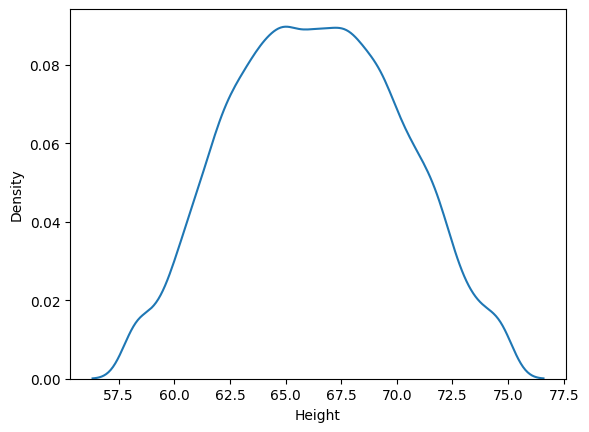

In [84]:
sns.kdeplot(df['Height'])

<Axes: ylabel='Height'>

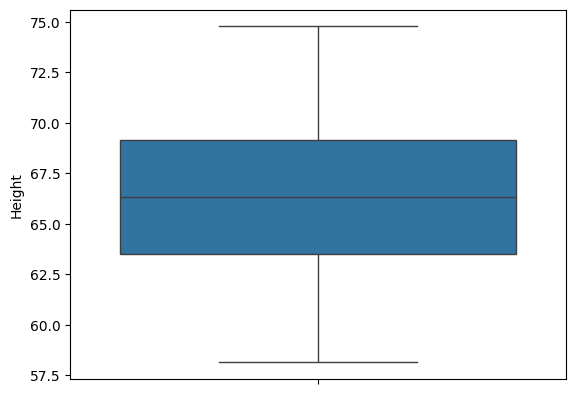

In [85]:
sns.boxplot(df['Height'])

No Outliers

###There is also inbuilt function for Winsarization in library Sci-Py but code is general and simple so it is not preffered